# Interaction example

In this example we implement a simple interaction use-case. This lets you get a feel for the performance (FPS, lag). Note that the snappyness will depend on where the server is (e.g. localhost will work better than MyBinder).

The app presents a dark background with cyan square that can be dragged around.

In [1]:
import numpy as np
import jupyter_rfb

RFBOutputContext()

InteractionApp()
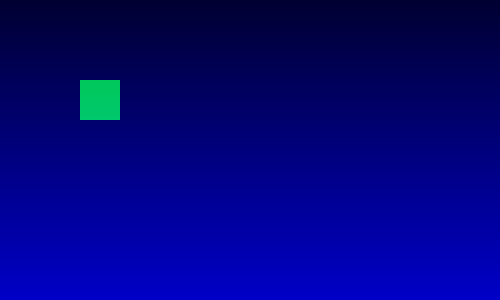

In [2]:
class InteractionApp(jupyter_rfb.RemoteFrameBuffer):
    def __init__(self):
        super().__init__()
        self._size = (1, 1, 1)
        self._pos = 100, 100
        self._radius = 20
        self._drag_pos = None

    def handle_event(self, event):
        event_type = event.get("event_type", None)
        if event_type == "resize":
            self._size = event["width"], event["height"], event["pixel_ratio"]
        elif event_type == "pointer_down" and event["button"] == 1:
            x, y = event["x"], event["y"]
            if (
                abs(x - self._pos[0]) < self._radius
                and abs(y - self._pos[1]) < self._radius
            ):
                self._drag_pos = self._pos[0] - x, self._pos[1] - y
            self.request_draw()
        elif event_type == "pointer_up":
            self._drag_pos = None
            self.request_draw()
        elif event_type == "pointer_move" and self._drag_pos is not None:
            self._pos = self._drag_pos[0] + event["x"], self._drag_pos[1] + event["y"]
            self.request_draw()

    def get_frame(self):
        ratio = self._size[2]
        radius = self._radius
        w, h = int(self._size[0] * ratio), int(self._size[1] * ratio)
        array = np.zeros((h, w, 3), np.uint8)
        array[:, :, 2] = np.linspace(50, 200, h).reshape(-1, 1)  # bg gradient
        array[
            int(ratio * (self._pos[1] - radius)) : int(ratio * (self._pos[1] + radius)),
            int(ratio * (self._pos[0] - radius)) : int(ratio * (self._pos[0] + radius)),
            1,
        ] = 250 if self._drag_pos else 200
        return array


w = InteractionApp()
w.max_buffered_frames = 2
w

You can now interact with the figure by dragging the square to another position.

In [3]:
# Or we can do that programatically :)
w.handle_event({"event_type": "pointer_down", "button": 1, "x": 100, "y": 100})
w.handle_event({"event_type": "pointer_move", "button": 1, "x": 200, "y": 200})
w.handle_event({"event_type": "pointer_up", "button": 1, "x": 200, "y": 200})


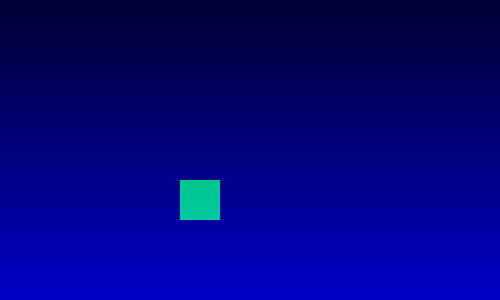

In [4]:
w.snapshot()

To get some quantative resuls, run ``reset_stats()``, interact, and then call ``get_stats()``.

In [5]:
w.reset_stats()

In [6]:
w.get_stats()

{'sent_frames': 0,
 'confirmed_frames': 0,
 'roundtrip': 0.0,
 'delivery': 0.0,
 'img_encoding': 0.0,
 'b64_encoding': 0.0,
 'fps': 0.0}